# Simple Logistic Regression 

## Import Libraries 

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set() 

## Import Raw Data 

In [68]:
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [69]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})

In [71]:
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


## Exploring Data 

In [72]:
y = data['Admitted']
x1 = data['SAT']

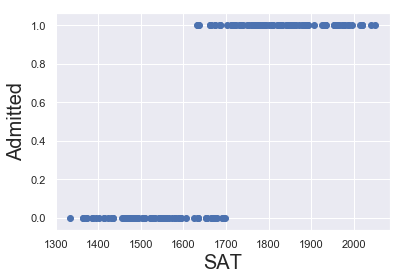

In [73]:
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

Obviously this data set is not suitable for linear regression

## Plot with Logit Regression

Logit regression predicts the probability of an event occuring


$log\frac{p}{1-p} = b_{0} + b_{1} * x_{1}$

$p = P(Y=1)$

In [74]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x).fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


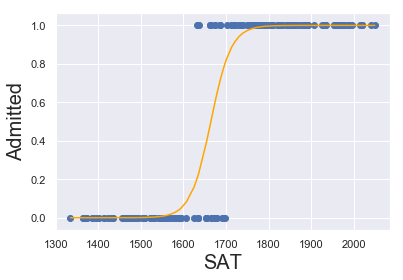

In [75]:
plt.scatter(x1, y)
b0 = reg_log.params[0]
b1 = reg_log.params[1]
y_hat = np.exp(b0+b1*x1) / (1+np.exp(b0+b1*x1))
x1 = np.sort(x1)
y_hat = np.sort(y_hat)

plt.plot(x1, y_hat, c='orange')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

In [76]:
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sat, 27 Jun 2020   Pseudo R-squ.:                  0.7992
Time:                        17:48:25   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Binary Predictor 

In [77]:
raw_data = pd.read_csv('2.02. Binary predictors.csv')

In [78]:
raw_data.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [81]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})

In [82]:
y = data['Admitted']
x1 = data[['SAT','Gender']]

In [83]:
x = sm.add_constant(x1)
reg_log1 = sm.Logit(y, x).fit()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


In [84]:
reg_log1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Sat, 27 Jun 2020   Pseudo R-squ.:                  0.8249
Time:                        17:48:41   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.4040     16.321     -4.068      0.000     -98.394     -34.414
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender        -1.9449      0.846     -2.299      0.022      -3.603      -0.287
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Accuracy

In [85]:
y_hat = reg_log1.predict()
y_hat = np.round(y_hat)
y_hat

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.])

In [86]:
pred = pd.DataFrame(reg_log1.pred_table(), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
pred

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [87]:
pred = np.array(pred)
accuracy = (pred[0,0]+pred[1,1])/pred.sum()
print('Accuracy:', accuracy)

Accuracy: 0.9464285714285714


## Testing the Model 

In [96]:
test = pd.read_csv("2.03. Test dataset.csv")
test.head()

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male


In [97]:
test['Admitted'] = test['Admitted'].map({'Yes':1,'No':0})
test['Gender'] = test['Gender'].map({'Male':1,'Female':0})

In [118]:
y_test = test['Admitted']
x_test = test.drop(labels='Admitted', axis=1)
x_test = sm.add_constant(x_test)

In [120]:
y_pred = reg_log1.predict(x_test)
bins = np.array([0,0.5,1])
cm = np.histogram2d(y_test, y_pred, bins=bins)[0]
cm

array([[ 5.,  1.],
       [ 1., 12.]])

In [121]:
accuracy = (cm[0,0]+cm[1,1])/cm.sum()
accuracy

0.8947368421052632